#1) Pre Processing








**Step 1. First look to the Dataset**

Story of Dataset: The dataset is part of the large dataset held at the National Institutes of Diabetes-Digestive-Kidney Diseases in the USA. Data used for diabetes research on Pima Indian women aged 21 and over living in Phoenix.



**Step 2. EDA (Exploratory Data Analysis)**

This is the part of the explore the dataset. The outliers and missing value analyses will be done in this part but the only point is to observe these in this part. The operation and editing for these will be done in Part 3: Pre-processing.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler




In [ ]:
# Adjustment of visibility of Datafreames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [ ]:
df = pd.read_csv("Diabetic_Patients.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [ ]:
print("##################### Shape #####################")
print(df.shape)
print("##################### Types #####################")
print(df.dtypes)
print("##################### NA #####################")
print(df.isnull().sum())
print("##################### Quantiles #####################")
print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### NA #####################
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
##################### Quantiles #####################
                          0.000  0.050   0.500   0.950   0.990   1.000
Pregnancies               0.000  0.000   3.000  10.000  13.000  17.000
Glucose                   0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


The target variable, Outcome, seems as a numerical variable, but it is known that it is categorical since this column only includes 1 and 0 (disease or no disease). These kinds of variables have to be considered categorical.

To differentiate the types of variables(grab_col_names). In this problem, I considered that if a numerical variable has less than 10 different values, it is actually categorical. If a categorical value has more than 20 different values, it is cardinal. Since our all variables are numerical, there will not be any cardinal variable.

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # report
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')  # the number of categorical variables
    print(f'num_cols: {len(num_cols)}')  # the number of numerical variables
    print(f'cat_but_car: {len(cat_but_car)}')  # the number of cardinal variables
    print(f'num_but_cat: {len(num_but_cat)}')  # the number of categorical variables that looks numerical
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [ ]:
# It can be seen that "Outcome" is a categorical variable, which is the target value.
print("Categorical columns:",cat_cols)
print("Numerical columns:", num_cols)
print("Cardinal columns:", cat_but_car)

Categorical columns: ['Outcome']
Numerical columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Cardinal columns: []


In [ ]:
# Target variable analysis
# The average of the numerical variables according to the target variable
df.groupby(cat_cols)[num_cols].mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298,109.980,68.184,19.664,68.792,30.304,0.430,31.190
1,4.866,141.257,70.825,22.164,100.336,35.143,0.550,37.067


In [ ]:
# The average of the target variable according to the categorical variables
df[cat_cols].mean()

Outcome   0.349
dtype: float64

In [ ]:
print(df.Outcome.value_counts())
print("-------------------------------")
print(df[cat_cols].mean())
print("-------------------------------")
print("Ratio: ")
(df.Outcome.value_counts() / len(df)) *100

0    500
1    268
Name: Outcome, dtype: int64
-------------------------------
Outcome   0.349
dtype: float64
-------------------------------
Ratio: 


0   65.104
1   34.896
Name: Outcome, dtype: float64

**Step 3.  Analysing outliers and missing values**

- Outliers

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


There are 2 points:

"Insulin" has a high standard deviation, the quartile values are large, and the outlier is clear.

"SkinThickness" quartile distribution is uneven.

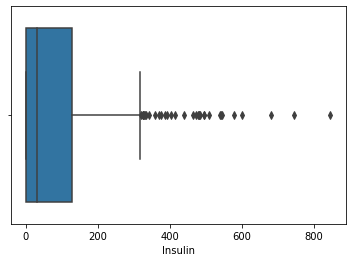

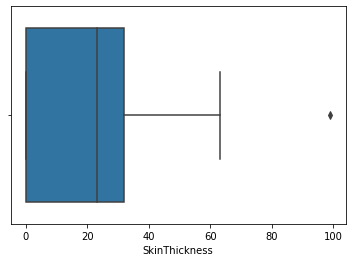

In [ ]:
# Boxplot
sns.boxplot(x=df["Insulin"])
plt.show()

sns.boxplot(x=df["SkinThickness"])
plt.show()

It has been mentioned that the critical point of the outliers is to determine the threshold. In the boxplot, IQR method will be used. A range named IQR(Interquartile Range) is to be determined according to quartiles, then, up limit and low limit will be found.

IQR = Q3 - Q1

Q3: 75% quantile
Q1: 25% quantile

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
for i in df.columns:
    print("Thresholds of {} : ({:.2f}, {:.2f})".format(i, *outlier_thresholds(df,i)))

Thresholds of Pregnancies : (-6.50, 13.50)
Thresholds of Glucose : (37.12, 202.12)
Thresholds of BloodPressure : (35.00, 107.00)
Thresholds of SkinThickness : (-48.00, 80.00)
Thresholds of Insulin : (-190.88, 318.12)
Thresholds of BMI : (13.35, 50.55)
Thresholds of DiabetesPedigreeFunction : (-0.33, 1.20)
Thresholds of Age : (-1.50, 66.50)
Thresholds of Outcome : (-1.50, 2.50)


- Missing Values

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

At the first look, it seems there is no missing value.however, a person's glucose or insulin value can not be 0. Considering this situation, let's assign the 0 values to the relevant values as NaN and then apply the operations to the missing values.

Here, the pregnancy value can be 0. It is a normal situation, hence, this column will be out of NaN.

In [ ]:
# df before adding NaN
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


In [ ]:
num_cols_miss = [i for i in num_cols if i != "Pregnancies"]
for i in num_cols_miss:
    df[i] = df.apply(lambda x: np.nan if x[i] == 0 else x[i], axis=1)

In [ ]:
# df after adding NaN
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50.000,1
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31.000,0
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32.000,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1
5,5,116.000,74.000,NaN,NaN,25.600,0.201,30.000,0
6,3,78.000,50.000,32.000,88.000,31.000,0.248,26.000,1
7,10,115.000,NaN,NaN,NaN,35.300,0.134,29.000,0
8,2,197.000,70.000,45.000,543.000,30.500,0.158,53.000,1
9,8,125.000,96.000,NaN,NaN,NaN,0.232,54.000,1


Now, we have missing values, and analysis can be done. Check the missing values again.

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

For missing values, there a library named "missingno", which was imported at the beginning. This library provides visual analysis for missing values.

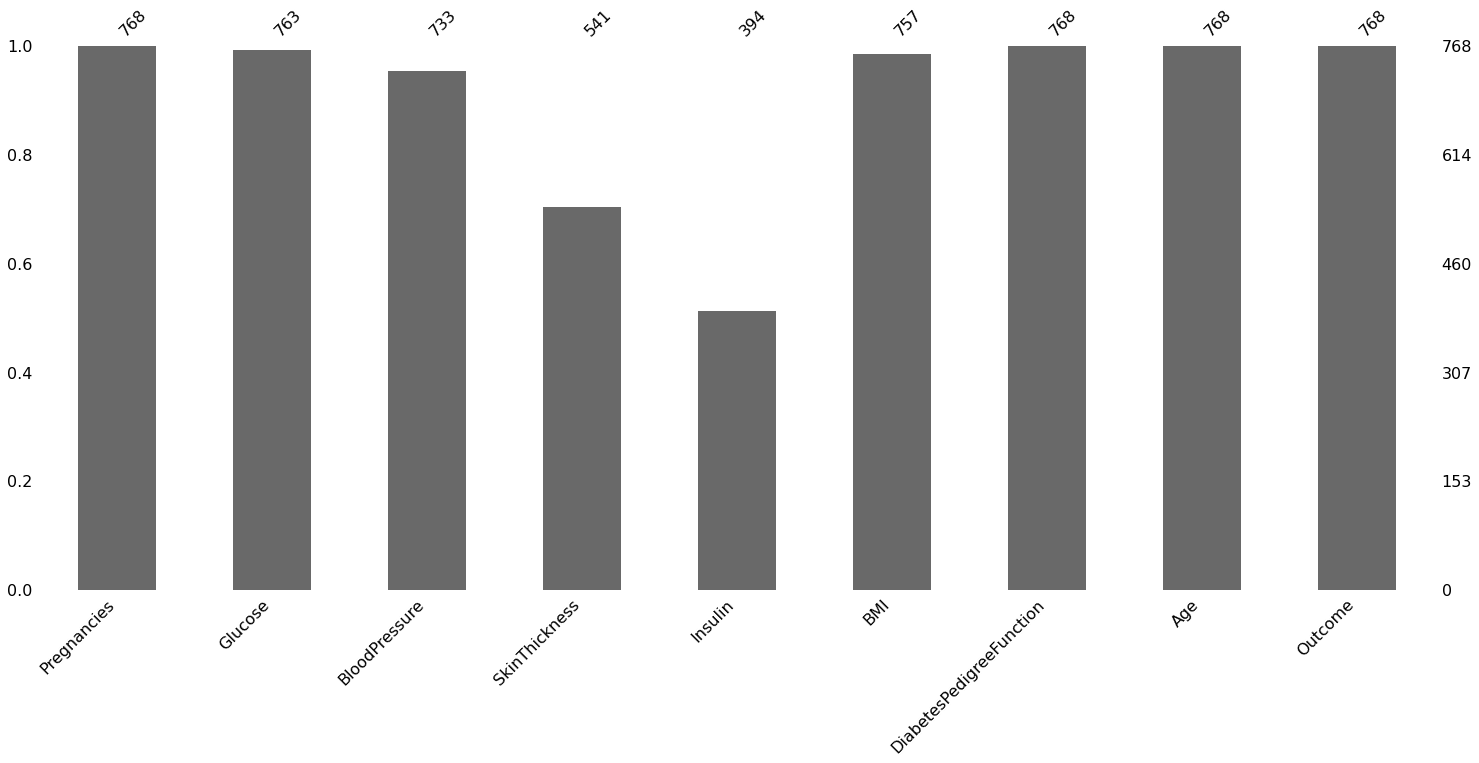

In [ ]:
# the number of non-missing data
msno.bar(df)
plt.show()

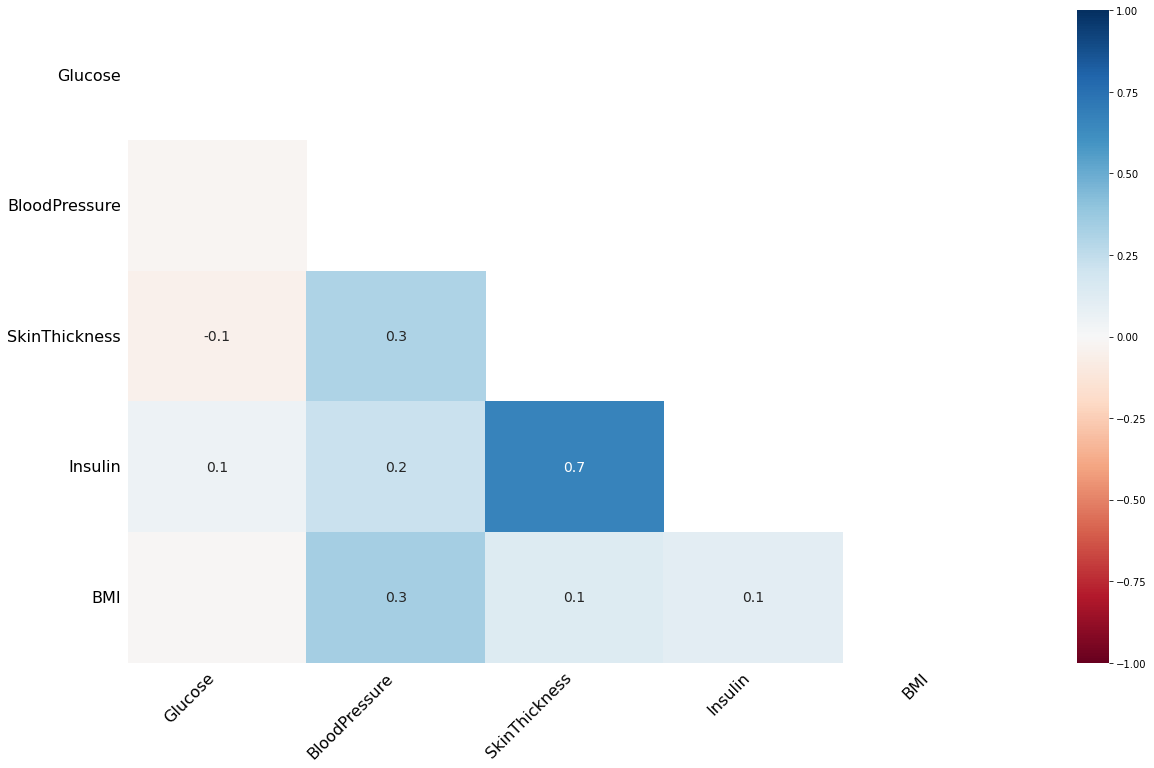

In [ ]:
"""
heatmap can be used rather than try to observe with eyes on matrix map
this heatmap shows the correlation of missing values on variables
"""
msno.heatmap(df)
plt.show()

There is an interesting finding that there is a strong positive correlation between "SkinThickness" and "Insulin" variables' missing values.

a function that shows the missing values on a dataframe as a table.

In [ ]:
def missing_values_table(dataframe, na_name=False):
    # only take missing columns
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)  # number of missing value
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False) # ratio
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])  # make table
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [ ]:
missing_values_table(df)

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650


In [ ]:
# if column names wants to be stored, na_name argument can be made True
na_cols = missing_values_table(df, na_name=True)
na_cols

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650


['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
# We created na_cols above, it can be taken with similar way in function:
# na_columns = [i for i in df.columns if df[i].isnull().sum() > 0]
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


missing_vs_target(df, "Outcome", na_cols)

                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                      0.349    763
1                      0.400      5


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                            0.344    733
1                            0.457     35


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                            0.333    541
1                            0.388    227


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                      0.330    394
1                      0.369    374


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0                  0.351    757
1                  0.182     11




On NA_FLAG variables, the missing values are filled with 1, and 0 where there is no missing value. For instance, in Glucose, there are 763 non-missing values and 5 missing values. The mean Outcome for non-missing values is 0.349, and the mean of Outcome for missing values is 0.4.


For example, we may drop "Insulin" because almost half of it missing, but when the relationship between the target is investigated, the mean of disease is much more than non-missing values. The same situation can be observed on SkinThickness.  

In [ ]:
df_cor = pd.DataFrame([df["Outcome"].corr(df[i]) for i in num_cols], index=num_cols, columns=["Correlation"])
df_cor

,Correlation
Pregnancies,0.222
Glucose,0.495
BloodPressure,0.171
SkinThickness,0.259
Insulin,0.303
BMI,0.314
DiabetesPedigreeFunction,0.174
Age,0.238


The most considerable variable is Glucose, but Insuline may not be ignored even if it has too many missing values because there is a slight correlation, as well.

**Step 4. Pre-processing (Solve Outliers and Missing Values)**

***Missing Values: ***

there are 3 solution to missing values.

- Deleting: It means dropping the rows that include missing values. Especially in a small dataset, it creates a loss of information. For example, the dataset has 768 rows, but Insuline has 374 missing values. If missing values are dropped, half of the dataset has been lost, and the information will be lost, as well. If the dataset would be large, and there are a couple of missing values that can be sacrificed, deleting can be an option.

In [ ]:
df_new = df.copy() # copy dataset to see effect without damage the main dataset
df_new.shape

(768, 9)

In [ ]:
df_new.dropna(inplace=True)
df_new.shape

(392, 9)

- Value Assignment Methods: We can fill the NaN values with the column's mean, median, mode, etc. If the distribution is homogeneous, filling with median or mean is logical. Also, in some scenarios, filling with a specific number like 0 would make sense.

In [ ]:
df_fill = df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
df_fill.head(10) # after filling

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1
5,5,116.000,74.000,29.000,125.000,25.600,0.201,30.000,0
6,3,78.000,50.000,32.000,88.000,31.000,0.248,26.000,1
7,10,115.000,72.000,29.000,125.000,35.300,0.134,29.000,0
8,2,197.000,70.000,45.000,543.000,30.500,0.158,53.000,1
9,8,125.000,96.000,29.000,125.000,32.300,0.232,54.000,1


In [ ]:
# before filling
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50.000,1
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31.000,0
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32.000,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1
5,5,116.000,74.000,NaN,NaN,25.600,0.201,30.000,0
6,3,78.000,50.000,32.000,88.000,31.000,0.248,26.000,1
7,10,115.000,NaN,NaN,NaN,35.300,0.134,29.000,0
8,2,197.000,70.000,45.000,543.000,30.500,0.158,53.000,1
9,8,125.000,96.000,NaN,NaN,NaN,0.232,54.000,1


- Predictive Methods: This method is based on machine learning, statistical methods, etc. It is an advanced level to fill NaN values. A model can be implemented and missing values are predicted by that model in this method.



In [ ]:
df_ml = df.copy()

# standardization
scaler = MinMaxScaler()
df_ml = pd.DataFrame(scaler.fit_transform(df_ml), columns=df_ml.columns)
df_ml.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.353,0.671,0.490,0.304,NaN,0.315,0.234,0.483,1.000
1,0.059,0.265,0.429,0.239,NaN,0.172,0.117,0.167,0.000
2,0.471,0.897,0.408,NaN,NaN,0.104,0.254,0.183,1.000
3,0.059,0.290,0.429,0.174,0.096,0.202,0.038,0.000,0.000
4,0.000,0.600,0.163,0.304,0.185,0.509,0.944,0.200,1.000


In [ ]:
# fill with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_ml = pd.DataFrame(imputer.fit_transform(df_ml), columns=df_ml.columns)
df_ml.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.353,0.671,0.490,0.304,0.385,0.315,0.234,0.483,1.000
1,0.059,0.265,0.429,0.239,0.051,0.172,0.117,0.167,0.000
2,0.471,0.897,0.408,0.274,0.269,0.104,0.254,0.183,1.000
3,0.059,0.290,0.429,0.174,0.096,0.202,0.038,0.000,0.000
4,0.000,0.600,0.163,0.304,0.185,0.509,0.944,0.200,1.000


In this way, we have completed the filling process, but the problem is all values we filled become standardized. It can turn the normal values with "inverse_transform".

In [ ]:
df_ml = pd.DataFrame(scaler.inverse_transform(df_ml), columns=df_ml.columns)
df_ml.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000,148.000,72.000,35.000,334.200,33.600,0.627,50.000,1.000
1,1.000,85.000,66.000,29.000,56.200,26.600,0.351,31.000,0.000
2,8.000,183.000,64.000,32.200,238.000,23.300,0.672,32.000,1.000
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0.000
4,0.000,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1.000


In [ ]:
# our first dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50.000,1
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31.000,0
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32.000,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1


In [ ]:
na_cols = missing_values_table(df, na_name=True) # columns that includes missing values
n_miss = df[na_cols].isnull().sum() # number of missing values on variables

# 100 as a threshold
na_cols_ml = [i for i in n_miss.index if n_miss[i] < 100]
na_cols_med = [i for i in n_miss.index if n_miss[i] > 100]
print("Columns that will be applied ML model:", na_cols_ml)
print("Columns that will be filled with median:", na_cols_med)

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650
Columns that will be applied ML model: ['Glucose', 'BloodPressure', 'BMI']
Columns that will be filled with median: ['SkinThickness', 'Insulin']


In [ ]:
# for the number of missing value is less than 100
df[na_cols_med] = df[na_cols_med].apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1
5,5,116.000,74.000,29.000,125.000,25.600,0.201,30.000,0
6,3,78.000,50.000,32.000,88.000,31.000,0.248,26.000,1
7,10,115.000,NaN,29.000,125.000,35.300,0.134,29.000,0
8,2,197.000,70.000,45.000,543.000,30.500,0.158,53.000,1
9,8,125.000,96.000,29.000,125.000,NaN,0.232,54.000,1


As it can be seen above, "SkinThickness" and "Insulin" have been filled with their median values. Now, variables that have slight number of missing values will be filled with ML model.

In [ ]:
# standardization
scaler = MinMaxScaler()

# take only needed columns
df[na_cols_ml] = pd.DataFrame(scaler.fit_transform(df[na_cols_ml]), columns=df[na_cols_ml].columns)
print(df[na_cols_ml].head())

# fill with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[na_cols_ml] = pd.DataFrame(imputer.fit_transform(df[na_cols_ml]), columns=df[na_cols_ml].columns)
print(df[na_cols_ml].head())

# from standardized to non-standardized
df[na_cols_ml] = pd.DataFrame(scaler.inverse_transform(df[na_cols_ml]), columns=df[na_cols_ml].columns)
print(df[na_cols_ml].head())

   Glucose  BloodPressure   BMI
0    0.671          0.490 0.315
1    0.265          0.429 0.172
2    0.897          0.408 0.104
3    0.290          0.429 0.202
4    0.600          0.163 0.509
   Glucose  BloodPressure   BMI
0    0.671          0.490 0.315
1    0.265          0.429 0.172
2    0.897          0.408 0.104
3    0.290          0.429 0.202
4    0.600          0.163 0.509
   Glucose  BloodPressure    BMI
0  148.000         72.000 33.600
1   85.000         66.000 26.600
2  183.000         64.000 23.300
3   89.000         66.000 28.100
4  137.000         40.000 43.100


In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1
5,5,116.000,74.000,29.000,125.000,25.600,0.201,30.000,0
6,3,78.000,50.000,32.000,88.000,31.000,0.248,26.000,1
7,10,115.000,78.200,29.000,125.000,35.300,0.134,29.000,0
8,2,197.000,70.000,45.000,543.000,30.500,0.158,53.000,1
9,8,125.000,96.000,29.000,125.000,31.100,0.232,54.000,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*** Outliers***

- Local Outlier Factor (LOF):  
 It helps us to define outliers accordingly by ordering the observations based on the density at their location. The local density of a point means the neighborhoods around that point. If a point is significantly less dense than its neighbors, then that point is in a more sparse region, so there may be an outlier. The LOF method allows us to calculate a distance score based on neighborhoods.


In [ ]:
df_ex = pd.DataFrame({"age": [17, 35, 47],
                     "pregnancy": [5, 2, 3]})
df_ex

,age,pregnancy
0,17,5
1,35,2
2,47,3


When we take the variables separately, "Age" is looking fine. A person can be 17, 35, or 47 years old. Similarly, "Pregnancy" has no problem if we consider only the number of pregnancies because a person can be pregnant 5 times, twice, or 3 times.

Now, check the first index, the values have meanings separately, but together, a person 17 years old cannot be pregnant 5 times. This is an outlier row. LOF helps us to find these kinds of values and fix these.

In [ ]:
# LOF
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)  # returns LOF scores
df_scores = clf.negative_outlier_factor_ # keep scores to observe (negative)
# df_scores = -df_scores # for changing to pozitive but we will use as negative
print(df_scores[0:5])
print(np.sort(df_scores)[0:5])

[-1.01906445 -0.99569451 -1.0618044  -0.99166551 -1.27903361]
[-2.80654993 -2.59693313 -2.4153327  -2.02605837 -1.99003552]


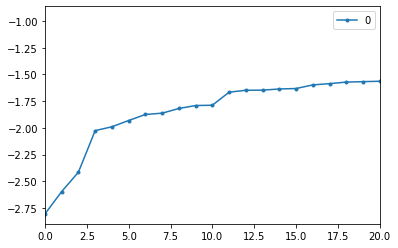

In [ ]:
# elbow method
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show()

There are observations on the x-axis and outlier scores on the y-axis. Each point represents threshold values and a graph was created according to these threshold values. The threshold value has to be decided according to the table. The point where the steepest slope change is the 3rd index

In [ ]:
th = np.sort(df_scores)[3]  # set any lower scores than that as outlier
df[df_scores < th] # check outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189.000,60.000,23.000,846.000,30.100,0.398,59.000,1
445,0,180.000,78.000,63.000,14.000,59.400,2.420,25.000,1
579,2,197.000,70.000,99.000,125.000,34.700,0.575,62.000,1


In [ ]:
df.describe([0.01, 0.05, 0.25, 0.50, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,99%,max
Pregnancies,768.000,3.845,3.370,0.000,0.000,0.000,1.000,3.000,6.000,9.000,13.000,17.000
Glucose,768.000,121.680,30.444,44.000,67.670,80.000,99.750,117.000,140.250,167.000,196.000,199.000
BloodPressure,768.000,72.416,12.202,24.000,44.000,52.000,64.000,72.000,80.000,88.000,106.000,122.000
SkinThickness,768.000,29.108,8.791,7.000,10.000,14.350,25.000,29.000,32.000,40.000,51.330,99.000
Insulin,768.000,140.672,86.383,14.000,24.340,50.000,121.500,125.000,127.250,210.000,519.900,846.000
BMI,768.000,32.461,6.883,18.200,19.500,22.235,27.500,32.300,36.600,41.500,50.759,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.095,0.140,0.244,0.372,0.626,0.879,1.698,2.420
Age,768.000,33.241,11.760,21.000,21.000,21.000,24.000,29.000,41.000,51.000,67.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000


In [ ]:
print("Before delete outliers:", df.shape)
print(df[df_scores < th].index) # indexes of outliers, just for observation
df.drop(axis=0, labels=df[df_scores < th].index, inplace=True)
print("After delete outliers:", df.shape)

Before delete outliers: (768, 9)
Int64Index([13, 445, 579], dtype='int64')
After delete outliers: (765, 9)


- IQR: We find the thresholds on analysis using IQR calculation. Now, re-assignment with thresholds will be done. It means the outliers will be replaced with upper and lower thresholds. Why this kind of process is made is based on preventing the loss of data. Especially in the small dataset, each data is significant.

In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
# before re-assignment
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,765.000,3.856,3.371,0.000,1.000,3.000,6.000,17.000
Glucose,765.000,121.418,30.209,44.000,99.000,117.000,140.000,199.000
BloodPressure,765.000,72.428,12.216,24.000,64.000,72.000,80.000,122.000
SkinThickness,765.000,28.980,8.344,7.000,25.000,29.000,32.000,60.000
Insulin,765.000,139.936,82.573,15.000,122.000,125.000,127.000,744.000
BMI,765.000,32.426,6.826,18.200,27.500,32.300,36.600,67.100
DiabetesPedigreeFunction,765.000,0.469,0.324,0.078,0.243,0.370,0.626,2.329
Age,765.000,33.180,11.696,21.000,24.000,29.000,41.000,81.000
Outcome,765.000,0.346,0.476,0.000,0.000,0.000,1.000,1.000


In [ ]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [ ]:
# after re-assignment
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,765.000,3.848,3.346,0.000,1.000,3.000,6.000,13.500
Glucose,765.000,121.418,30.209,44.000,99.000,117.000,140.000,199.000
BloodPressure,765.000,72.399,11.819,40.000,64.000,72.000,80.000,104.000
SkinThickness,765.000,28.839,7.421,14.500,25.000,29.000,32.000,42.500
Insulin,765.000,124.745,6.918,114.500,122.000,125.000,127.000,134.500
BMI,765.000,32.375,6.657,18.200,27.500,32.300,36.600,50.250
DiabetesPedigreeFunction,765.000,0.458,0.285,0.078,0.243,0.370,0.626,1.200
Age,765.000,33.139,11.563,21.000,24.000,29.000,41.000,66.500
Outcome,765.000,0.346,0.476,0.000,0.000,0.000,1.000,1.000


As it can be seen, min, max, event mean, and std values have changed according to thresholds. Solution of outliers has been completed with this process.

#2) Neural Network


because dependant variable is categorical and independant are numerical, ann gives a better accuracy

Preparation of the data:
- Split the data into a training set, dev set and test set.
- Normalize the data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

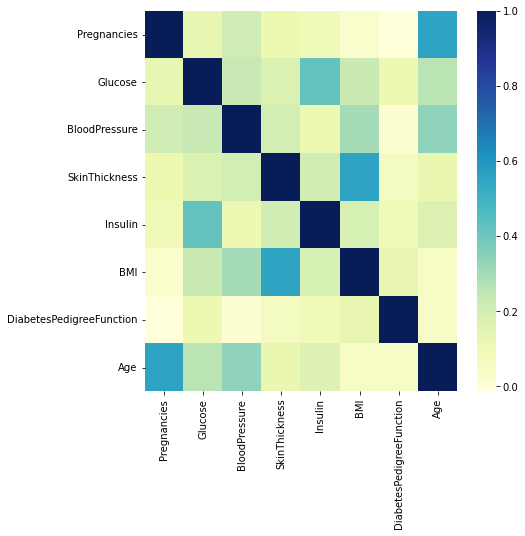

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(X.corr(),cmap='YlGnBu')

In [ ]:
len(X)

765

In [ ]:
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc1.fit(X_train)
X_test = sc1.transform(X_test)

In [ ]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
ann.add(tf.keras.layers.Dense(units=132, activation='relu'))
ann.add(tf.keras.layers.Dense(units=279, activation='relu'))
ann.add(tf.keras.layers.Dense(units=423, activation='relu'))
ann.add(tf.keras.layers.Dense(units=579, activation='relu'))
ann.add(tf.keras.layers.Dense(units=456, activation='relu'))
ann.add(tf.keras.layers.Dense(units=303, activation='relu'))
ann.add(tf.keras.layers.Dense(units=154, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


ann.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')
             ])


In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score,fbeta_score, f1_score

n_split=10

for train_index,test_index in KFold(n_split).split(X_train):
  x_train,x_test=X[train_index],X[test_index]
  y_train,y_test=y[train_index],y[test_index]

  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.transform(x_test)


  ann.fit(x_train, y_train, epochs=20)
  y_pred = ann.predict(x_test)
  y_pred = np.array([0  if i<0.5 else 1 for i in y_pred])

  # ann.evaluate(x_test, y_test)

  print(accuracy_score(y_test,y_pred))
  print(precision_score(y_test, y_pred))
  print(fbeta_score(y_test, y_pred, beta=0.5))
  print(f1_score(y_test, y_pred))


Epoch 1/20
18/18 [==============================] - 3s 15ms/step - loss: 0.5683 - accuracy: 0.7164 - precision: 0.5854 - recall: 0.5217
Epoch 2/20
18/18 [==============================] - 0s 14ms/step - loss: 0.5085 - accuracy: 0.7491 - precision: 0.6292 - recall: 0.6087
Epoch 3/20
18/18 [==============================] - 0s 15ms/step - loss: 0.5071 - accuracy: 0.7636 - precision: 0.6687 - recall: 0.5815
Epoch 4/20
18/18 [==============================] - 0s 13ms/step - loss: 0.4813 - accuracy: 0.7691 - precision: 0.6492 - recall: 0.6739
Epoch 5/20
18/18 [==============================] - 0s 14ms/step - loss: 0.4688 - accuracy: 0.7836 - precision: 0.6757 - recall: 0.6793
Epoch 6/20
18/18 [==============================] - 0s 14ms/step - loss: 0.4524 - accuracy: 0.7709 - precision: 0.6576 - recall: 0.6576
Epoch 7/20
18/18 [==============================] - 0s 15ms/step - loss: 0.4481 - accuracy: 0.7818 - precision: 0.6616 - recall: 0.7120
Epoch 8/20
18/18 [==============================

In [ ]:
Y_pred = ann.predict(X_test)
Y_pred = np.array([0  if i<0.5 else 1 for i in Y_pred])

5/5 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[87,  3],
       [13, 50]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,fbeta_score, f1_score
print(f'accuracy    : {accuracy_score(Y_test,Y_pred)}')
print(f'precision   : {precision_score(Y_test, Y_pred)}')
print(f'fBeta score : {fbeta_score(Y_test, Y_pred, beta=0.5)}')
print(f'f1 score    : {f1_score(Y_test, Y_pred)}')

accuracy    : 0.8954248366013072
precision   : 0.9433962264150944
fBeta score : 0.9090909090909092
f1 score    : 0.8620689655172413


In [ ]:
import sklearn.metrics as metrics

preds = Y_pred

fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

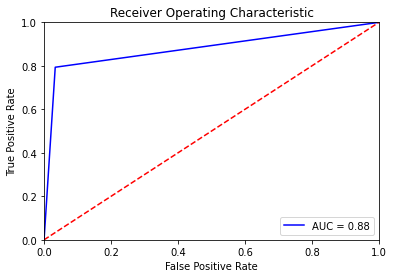

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#3) Linear regression

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Loading Dataset

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [ ]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


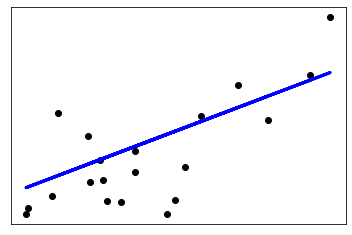

In [ ]:
#Scatter Plot
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# 4) Logistic Regression

*We are applying Logistic Regression classification algorithm to predict whether or not the patients in the dataset have diabetes or not.*

**1) Import Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

**3) Train/Test Split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Outcome',axis=1),
                                                 df['Outcome'],test_size=0.2,
                                                 random_state=0)

In [ ]:
X_train.shape,X_test.shape

((612, 8), (153, 8))

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

#fitting
scaler.fit(X_train)

#transforming
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
np.round(X_train_scaled.describe(),1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,612.000,612.000,612.000,612.000,612.000,612.000,612.000,612.000
mean,0.300,0.600,0.700,0.700,0.900,0.600,0.400,0.500
std,0.200,0.100,0.100,0.200,0.100,0.100,0.200,0.200
min,0.000,0.200,0.400,0.300,0.900,0.400,0.100,0.300
25%,0.100,0.500,0.600,0.600,0.900,0.600,0.200,0.400
50%,0.200,0.600,0.700,0.700,0.900,0.600,0.300,0.400
75%,0.400,0.700,0.800,0.800,1.000,0.700,0.500,0.600
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

**4) Logistic Regression Model Fitting**

In [ ]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.738562091503268

In [ ]:
accuracy_score(y_test,y_pred_scaled)

0.7647058823529411

We get a 76% precise classifier using Logistic Regression. To understand our evaluation in more depth we used confusion matrix metric. Confusion matrix helps us to understand the two types of error. Type I, also known as false positive and type II, also known as a false negative. Depending on the different domain these types are useful during the data analysis process

# 5) K Means Clustering

In general, k-means clustering is used to understand the underlying structure of the data, identify patterns and relationships between data points, and make inferences about the data. It can also be used as a pre-processing step for other machine learning algorithms. By clustering data points, k-means can reduce the complexity of the data, improve the interpretability of the results, and potentially improve the performance of subsequent algorithms.

**1) Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data Visualization**

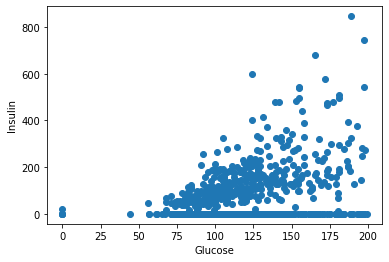

In [ ]:
plt.scatter(df['Glucose'], df['Insulin'])
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

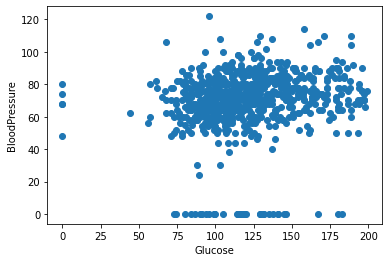

In [ ]:
plt.scatter(df['Glucose'], df['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

***First Visualization***

**Create a class**

In [ ]:
data1 = df.loc[:, ['Glucose', 'Insulin']]

**Kmeans**

In [ ]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(data1)
labels1 = kmeans1.predict(data1)

**Visualization**

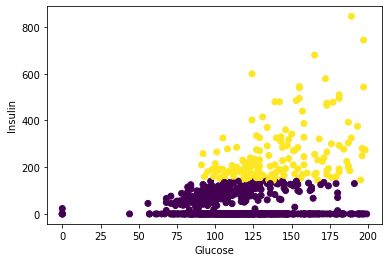

In [ ]:
plt.scatter(df['Glucose'], df['Insulin'], c = labels1)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

***Second Visualization***

**Create a class**

In [ ]:
data2 = df.loc[:, ['Glucose', 'BloodPressure']]

**Kmeans**

In [ ]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(data2)
labels2 = kmeans2.predict(data2)


**Visualization**

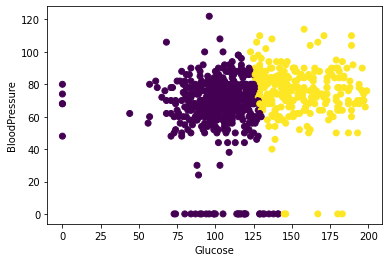

In [ ]:
plt.scatter(df['Glucose'], df['BloodPressure'], c = labels2)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

**Making Cross-Table**

In [ ]:
df = pd.DataFrame({'labels':labels2, 'Outcome':data['Outcome']})
crosstab = pd.crosstab(df['labels'],df['Outcome'])
crosstab

Outcome,0,1
labels,,
0,387,103
1,113,165



**This table shows us:**

In Label 0 class We have 387 patients without diabetes and 103 patients with diabetes.

In Label 1 class We have 113 patients without diabetes and 165 patients with diabetes.

**Finding Optimum K**

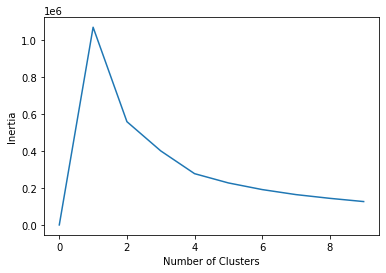

In [ ]:
iner_list = np.empty(10)
for i in range(1,10):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(data2)
    iner_list[i] = kmeans2.inertia_ # show the best number in graph

plt.plot(range(0,10), iner_list,'-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

**Standarization**

In [ ]:
data3 = df.drop('Outcome', axis = 1)
data3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
from sklearn.preprocessing import StandardScaler #This class is used to standardize the features in the data.
from sklearn.pipeline import make_pipeline #This function is used to create a pipeline of multiple processing steps.

sscaler = StandardScaler()
kmeans2 = KMeans(n_clusters=4)
pipeline = make_pipeline(sscaler, kmeans2)
pipeline.fit(data3)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4))])

***Cross Table***

The cross-tabulation shows the count of data points that belong to each label and have a certain outcome. The count helps in understanding the relationship between the predicted labels and the actual Outcome.

In [ ]:
labels = pipeline.predict(data3)
df = pd.DataFrame({'labels':labels, 'Outcome':data['Outcome']})
crosstab = pd.crosstab(df['labels'], df['Outcome'])
crosstab

Outcome,0,1
labels,,
0,300,44
1,70,106
2,20,16
3,110,102


The bar plot shows the distribution of the 'Outcome' variable (0 or 1, indicating whether a patient has diabetes or not) for each cluster label

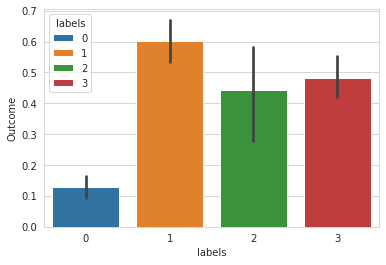

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.barplot(x=df['labels'], y=df['Outcome'], hue=df['labels'], dodge=False)

# 6) Decision Tree

**Why the decision tree needed?**

We used Decision Trees because it gives tree-like model it descibes every possible solution in algorithm which can easily understandable. It provides very effective and deep knowledge about the situation. That's how decision tree helps in ML.

Decision Trees have its output with some kind of category. So by generating the decision tree we can easily understand how it is categorized.

**1) Import Libraries**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

The main goal is to divide the data into distinct regions and to then make predictions based on those regions.

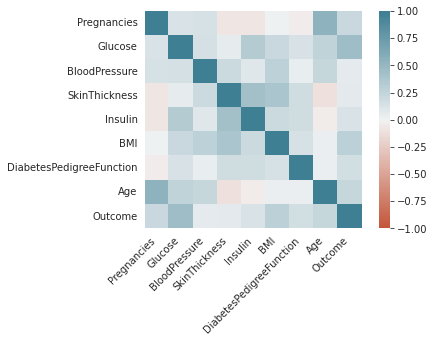

In [ ]:
import seaborn as sns #Heatmap, does random distribution of data
corr = df.corr() #Calculates the relationship between each column in your data set
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Decision trees can be used to model the relationship between the features and the outcome, and make predictions about the outcome based on the values of the features. The interpretability of decision trees can also be useful for understanding the relationship between the features and the outcome. The final result is a tree with decision nodes and leaf nodes, where the decision nodes represent the choices made based on the input features, and the leaf nodes represent the predictions made by the model. The decision tree algorithm starts at the root of the tree, and it works its way down by making decisions based on the values of the input features, until it reaches a leaf node that corresponds to a prediction.

In [ ]:
# feature selection
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = df[feature_cols]
y = df.Outcome

In [ ]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [ ]:
# build model
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)

In [ ]:
# predict
y_pred = classifier.predict(X_test) #The trained decision tree classifier to make predictions on the test set
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))

# accuracy
print("Accuracy:", metrics.accuracy_score(Y_test,y_pred))

[[113  33]
 [ 41  44]]
Accuracy: 0.6796536796536796


- The **gini impurity** is a metric that measures the purity of a node. That is, it measures how similar the observations are to each other. If all observations belong to the same class then the gini impurity would be 0 and the node would be considered ‘pure'.

- The algorithm won’t backtrack and change its mind for a previous split.

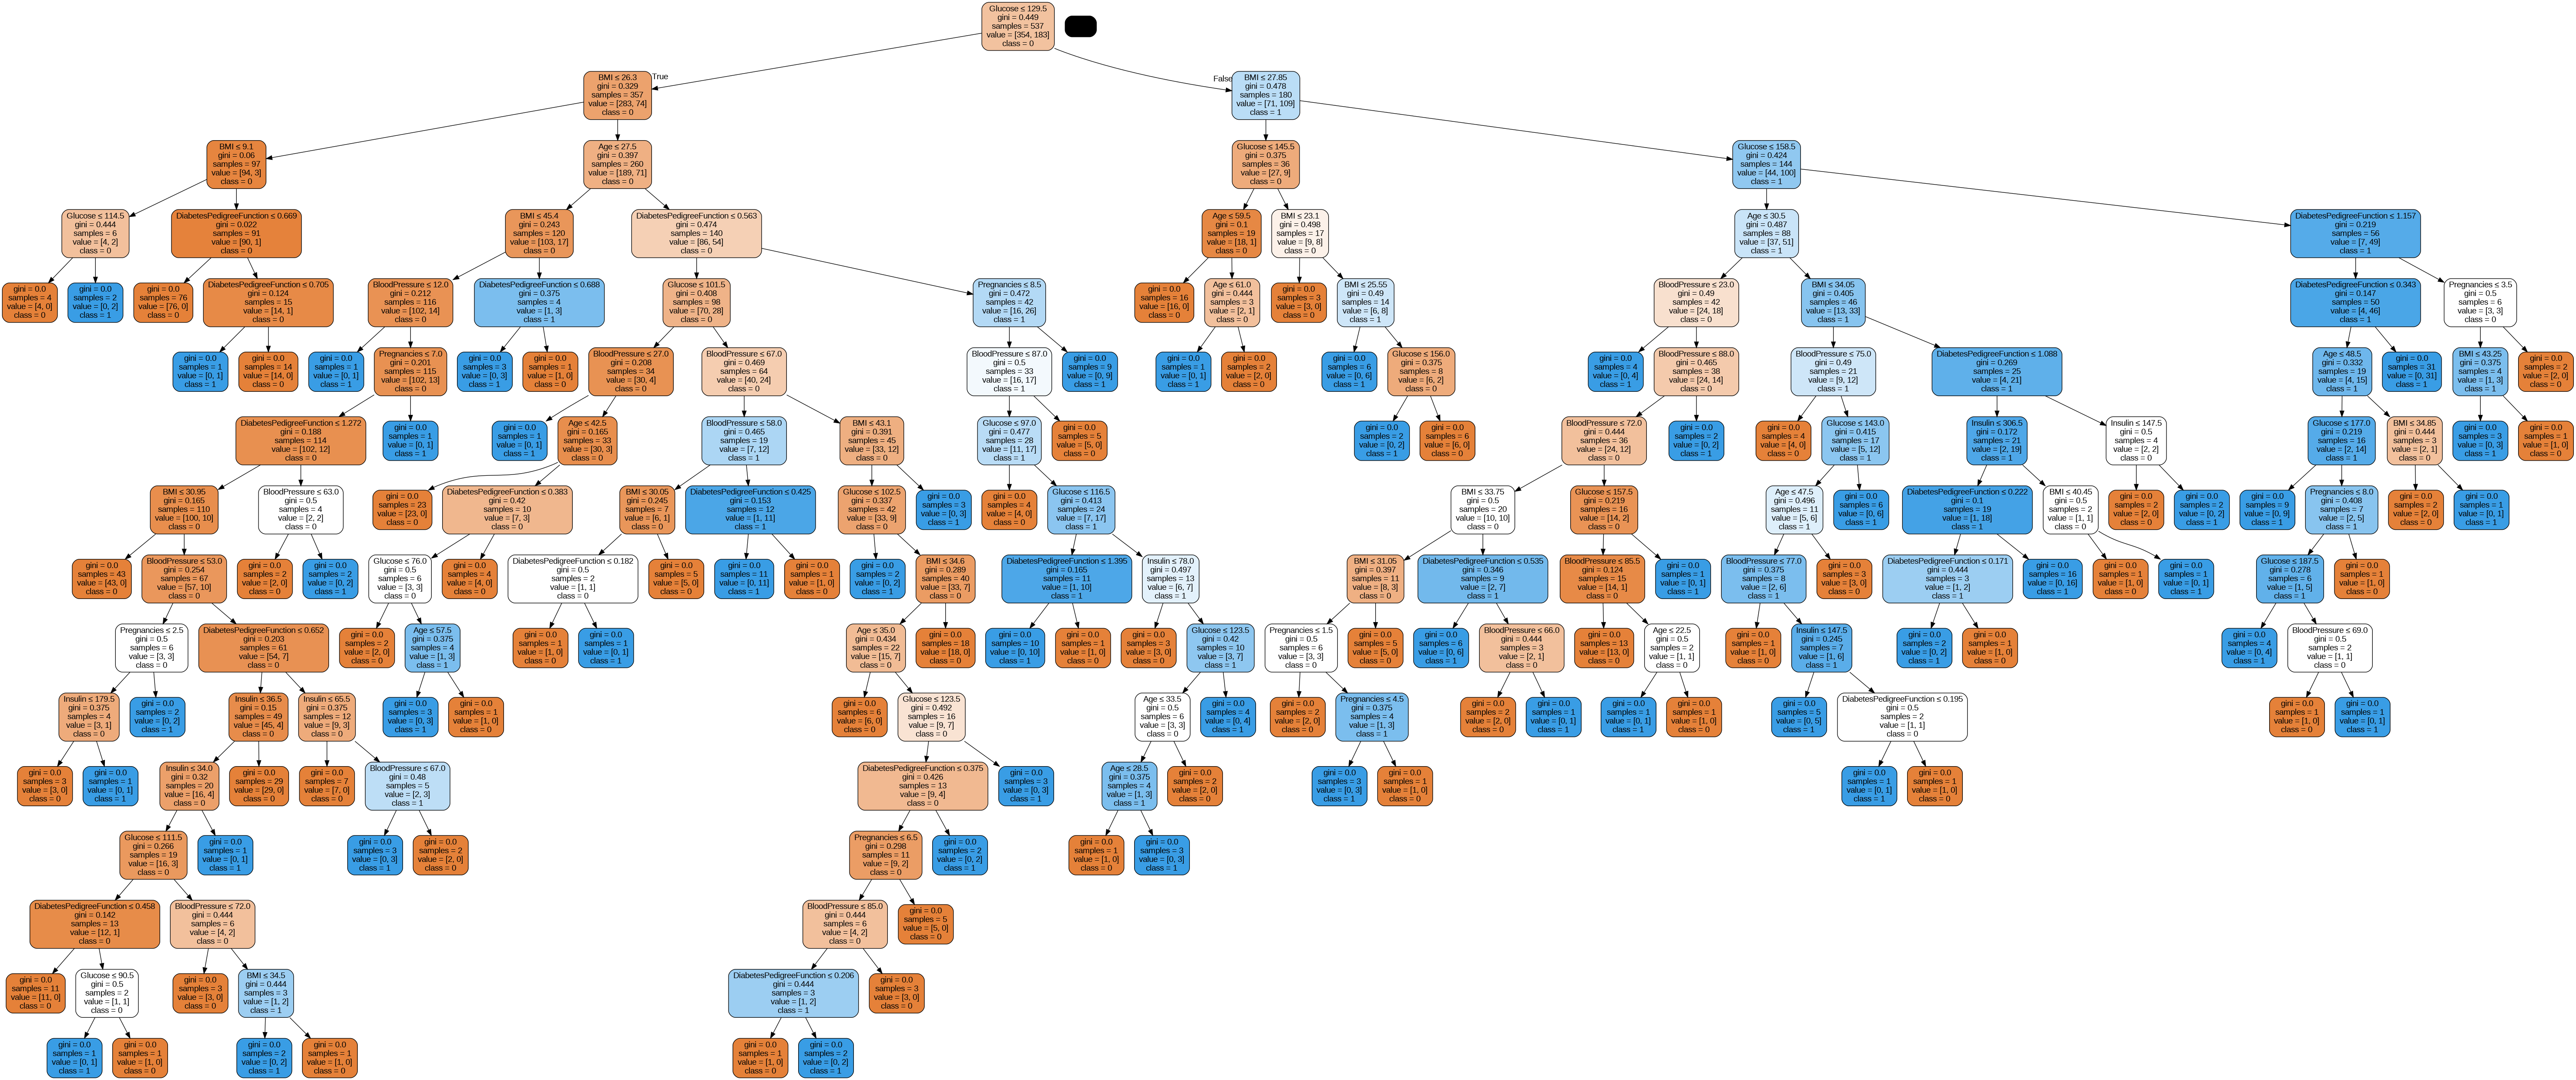

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())